<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0701_semi_supervised_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

<ipython-input-4-ea732dbc6870>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5, 10, i + 1)


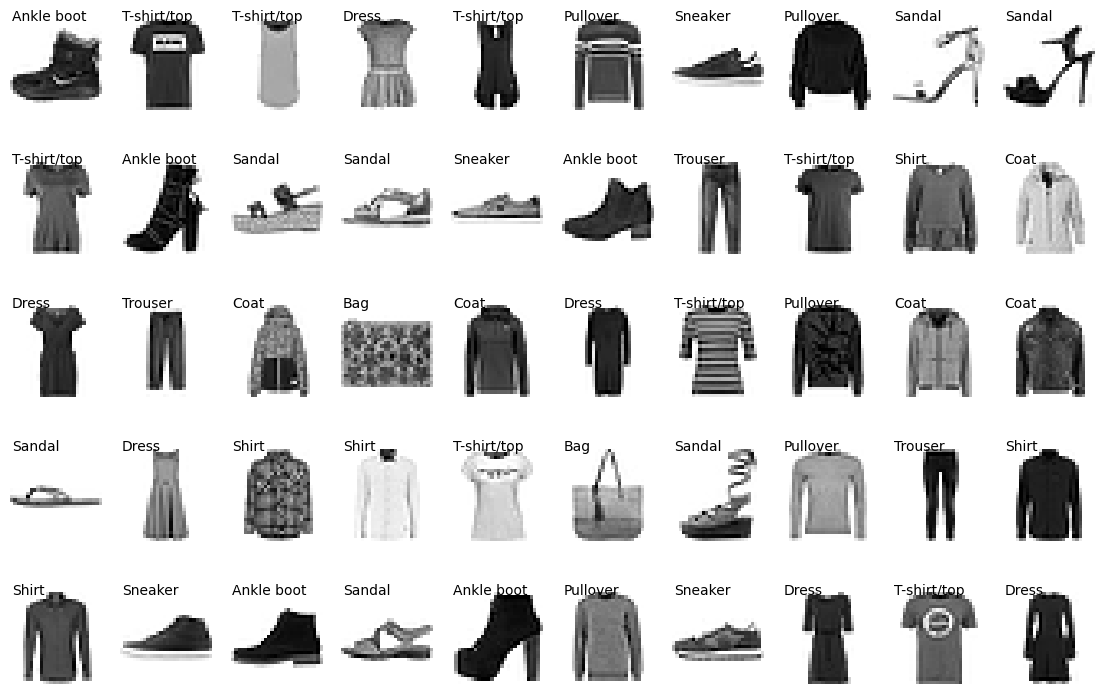

In [4]:
plt.subplots(figsize=(14, 9))
for i in range(50):
    ax = plt.subplot(5, 10, i + 1)
    ax.imshow(x_train[i], cmap='gray_r')
    ax.axis('off')
    ax.text(0, 0, labels[y_train[i]])
plt.show()

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [6]:
m = 2000

In [7]:
lr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
lr.fit(x_train[:m], y_train[:m])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [8]:
lr.score(x_test, y_test)

0.7625

In [9]:
k = 100
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
X_digits_dist = kmeans.fit_transform(x_train[:m])
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = x_train[representative_digit_idx]

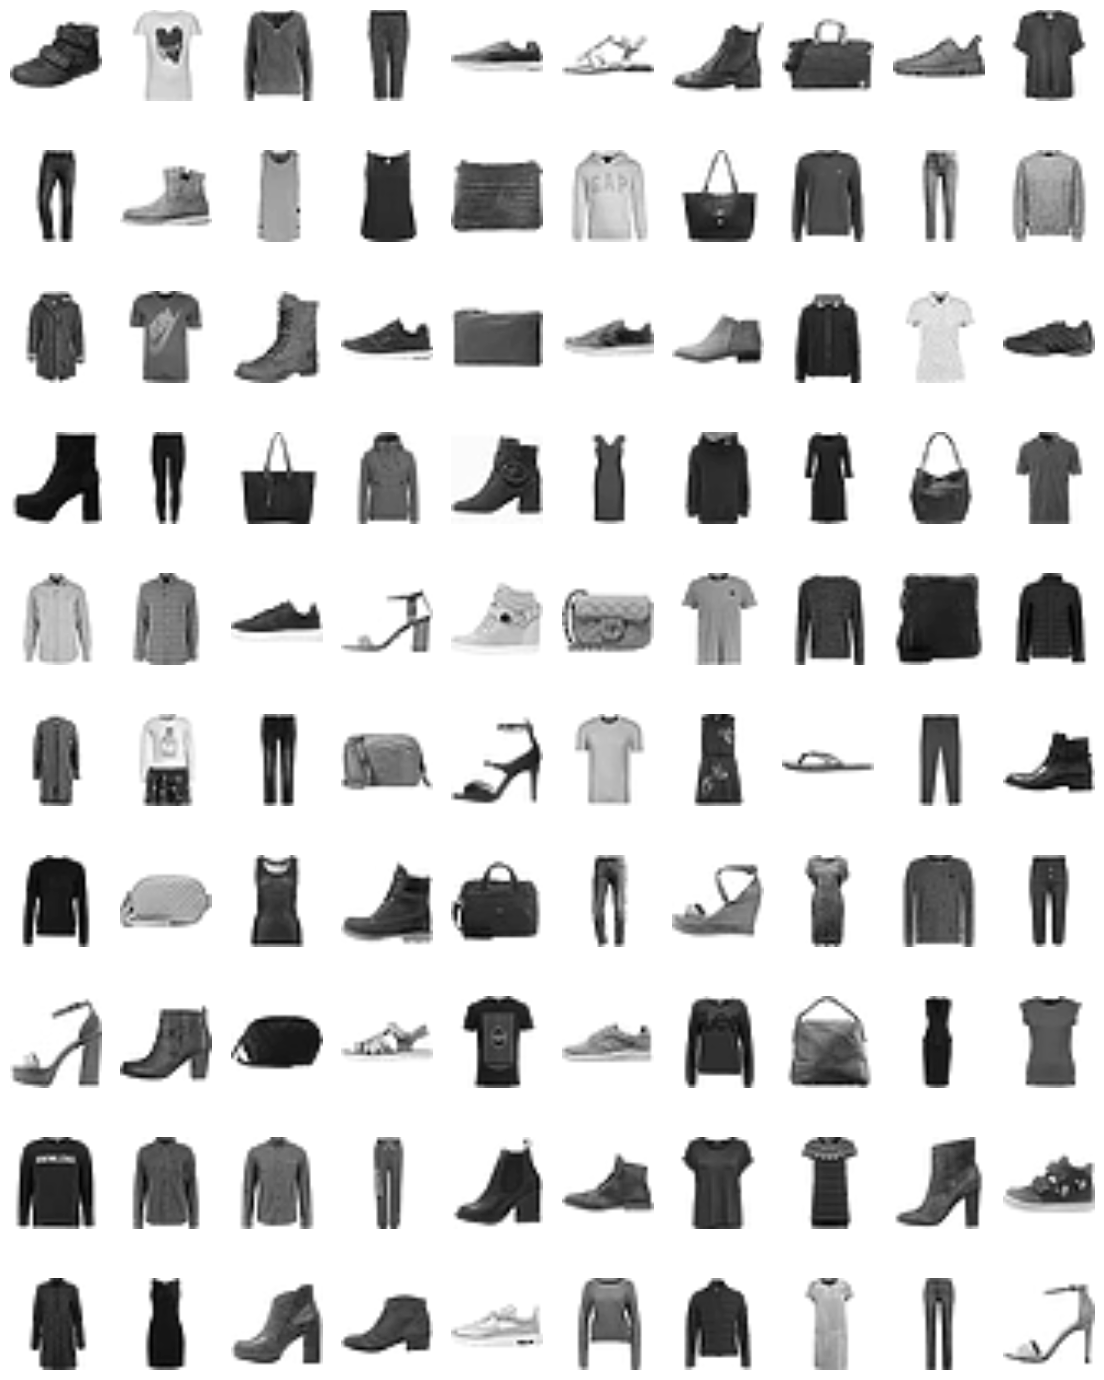

In [16]:
plt.figure(figsize=(14, 18))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap='binary', interpolation='bilinear')
    #plt.title(f"{labels[y_train[representative_digit_idx[index]]]}")
    plt.axis('off')
plt.show()

In [19]:
y_byhand = np.array(
    [7, 0, 2, 1, 7, 5, 9, 8, 7, 6, 1, 9, 0, 6, 8, 2, 8, 2, 1, 2, 4, 0,
     9, 7, 8, 7, 9, 4, 0, 7, 9, 1, 8, 4, 9, 3, 2, 3, 8, 0, 6, 6, 7, 5,
     7, 8, 0, 2, 8, 4, 3, 3, 1, 8, 5, 0, 3, 5, 1, 9, 2, 8, 0, 9, 8, 1,
     5, 3, 2, 1, 5, 9, 8, 5, 0, 7, 2, 8, 3, 0, 2, 6, 6, 1, 9, 9, 0, 3,
     9, 7, 6, 3, 9, 9, 7, 2, 4, 3, 1, 5])

In [20]:
lr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
lr.fit(X_representative_digits, y_byhand)
lr.score(x_test, y_test)

0.7049

In [22]:
y_train_propagated = np.empty(m, dtype=int)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_byhand[i]

In [23]:
lr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
lr.fit(x_train[:m], y_train_propagated)
lr.score(x_test, y_test)

0.6545

In [24]:
np.mean(y_train_propagated == y_train[:m])

0.6955